In [ ]:
# 1. 예측 함수 찾기: 1 / (1 + e^-z)
# 2. 손실 함수 찾기: -(y_true*log(y_pred) + (1-y_true)log(1 - y_pred))
# 3. 경사 하강법을 사용하여 손실을 최소화하는 계수 찾기

In [1]:
import tensorflow as tf
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

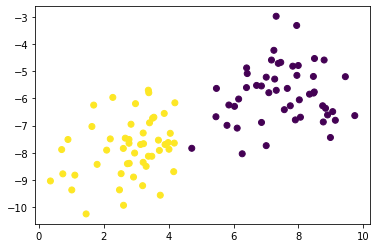

In [2]:
data, target = make_blobs(centers=2)
plt.scatter(data[:, 0], data[:, 1], c=target)

In [12]:
x.shape

(100, 2)

In [13]:
y.shape

(100,)

In [3]:
x = tf.constant(data, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

In [4]:
# 예측 함수를 정의하다
W = tf.Variable(np.random.randn(2, 1) * 0.02, dtype=tf.float32)
B = tf.Variable(0., dtype=tf.float32)


In [23]:
np.dot(x, np.random.randn(2, 1)).shape

(100, 1)

In [5]:
def sigmoid(x):
    linear = tf.matmul(x, W) + B
    return tf.nn.sigmoid(linear)

In [26]:
a = tf.constant([[1, 2, 3], [4, 5, 6]])

In [ ]:
a.reshape()

In [27]:
tf.reshape(a, [3, 2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]])>

In [28]:
tf.reshape(a, [6])

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6])>

In [6]:
# 손실을 정의하다
def cross_entropy_loss(y_true, y_pred):
    # y_pred를 잘라내다
    y_pred = tf.reshape(y_pred, shape=[100])
#     y_pred = tf.clip_by_value(y_pred, 1e-9, 1)
    return tf.reduce_mean(-(tf.multiply(y_true, tf.math.log(y_pred)) + tf.multiply((1 - y_true), tf.math.log(1 - y_pred)))) 

In [7]:
# 옵티마이저 정의하기
optimizer = tf.optimizers.SGD()

In [8]:
def run_optimization():
    with tf.GradientTape() as g:
        # 예측값 계산
        pred = sigmoid(x)
        loss = cross_entropy_loss(y, pred)
        
    # 기울기 계산
    gradients = g.gradient(loss, [W, B])
    # W, B 업데이트
    optimizer.apply_gradients(zip(gradients, [W, B]))

In [15]:
target

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [15]:
# 정확도 계산
def accuracy(y_true, y_pred):
 # 확률을 클래스로 변환해야 합니다.
 # 확률이 0.5보다 크면 양성으로 간주합니다
    y_pred = tf.reshape(y_pred, shape=[100])
    y_ = y_pred.numpy() > 0.5
    y_true = y_true.numpy()
    return (y_ == y_true).mean()

In [16]:
# 학습 과정 정의하기
for i in range(5000):
    run_optimization()
    
    if i % 100 == 0:
        pred = sigmoid(x)
        acc = accuracy(y, pred)
        loss = cross_entropy_loss(y, pred)
        print(f'훈련 횟수: {i}, 정확도: {acc}, 손실: {loss}')

训练次数: 0, 准确率: 0.78, 损失: 0.6216390132904053
训练次数: 100, 准确率: 0.99, 损失: 0.22109101712703705
训练次数: 200, 准确率: 0.99, 损失: 0.15342356264591217
训练次数: 300, 准确率: 0.99, 损失: 0.12484405189752579
训练次数: 400, 准确率: 0.99, 损失: 0.10863102227449417
训练次数: 500, 准确率: 0.99, 损失: 0.09799329936504364
训练次数: 600, 准确率: 0.99, 损失: 0.09038233757019043
训练次数: 700, 准确率: 0.99, 损失: 0.08461571484804153
训练次数: 800, 准确率: 0.99, 损失: 0.08006514608860016
训练次数: 900, 准确率: 0.99, 损失: 0.07636389136314392
训练次数: 1000, 准确率: 0.99, 损失: 0.07328209280967712
训练次数: 1100, 准确率: 0.99, 损失: 0.07066792994737625
训练次数: 1200, 准确率: 0.99, 损失: 0.06841666996479034
训练次数: 1300, 准确率: 0.99, 损失: 0.06645344197750092
训练次数: 1400, 准确率: 0.99, 损失: 0.06472320854663849
训练次数: 1500, 准确率: 0.99, 损失: 0.06318454444408417
训练次数: 1600, 准确率: 0.99, 损失: 0.06180550158023834
训练次数: 1700, 准确率: 0.99, 损失: 0.0605611614882946
训练次数: 1800, 准确率: 0.99, 损失: 0.05943163484334946
训练次数: 1900, 准确率: 0.99, 损失: 0.05840088799595833
训练次数: 2000, 准确率: 0.99, 损失: 0.057455841451883316
训练次数: 2100, 准确率: 0.99, 损失:

In [ ]:
tf.keras